In [91]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import seaborn as sb

# DISCOVER DATASET

In [2]:
data = pd.read_csv('antenna.csv')
data

,frequency,refcoef
0,1.000734,-22.165450
1,1.022761,-21.435523
2,1.048458,-20.462287
3,1.079662,-19.367397
4,1.110866,-18.150852
...,...,...
387,2.414097,-26.301703
388,2.434288,-25.693431
389,2.454479,-24.476886
390,2.472834,-24.111922


In [3]:
n = len(data)
k = 8 # kiểm định chéo 10-fold 
print(n)
for i in range(k):
    start = (n*i)//k
    end = (n*(i+1))//k-1
    print(i, (start, end))

392
0 (0, 48)
1 (49, 97)
2 (98, 146)
3 (147, 195)
4 (196, 244)
5 (245, 293)
6 (294, 342)
7 (343, 391)


In [4]:
rx1_data = data[0:49]
rx2_data = data[49:98]
rx3_data = data[98:147]
rx4_data = data[147:196]
rx5_data = data[196:245]
rx6_data = data[245:294]
rx7_data = data[294:343]
rx8_data = data[343:392]
print(rx1_data.shape)
print(rx2_data.shape)
print(rx3_data.shape)
print(rx4_data.shape)
print(rx5_data.shape)
print(rx6_data.shape)
print(rx7_data.shape)
print(rx8_data.shape)

(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)


In [5]:
display(rx1_data.tail())
display(rx2_data.tail())
display(rx3_data.tail())
display(rx4_data.tail())
display(rx5_data.tail())
display(rx6_data.tail())
display(rx7_data.tail())
display(rx8_data.tail())

,frequency,refcoef
44,2.414097,-20.827251
45,2.436123,-21.800487
46,2.456314,-22.043796
47,2.476505,-23.503650
48,2.493025,-26.666667


,frequency,refcoef
93,2.414097,-28.613139
94,2.434288,-28.004866
95,2.447137,-29.951338
96,2.469163,-31.776156
97,2.493025,-32.627737


,frequency,refcoef
142,2.408590,-45.766423
143,2.432452,-49.659367
144,2.447137,-49.659367
145,2.467327,-52.579075
146,2.494860,-44.671533


,frequency,refcoef
191,2.414097,-49.902676
192,2.430617,-51.727494
193,2.443465,-53.795620
194,2.459985,-54.160584
195,2.494860,-58.418491


,frequency,refcoef
240,2.414097,-51.119221
241,2.428781,-53.552311
242,2.450808,-55.985401
243,2.467327,-57.445255
244,2.496696,-51.605839


,frequency,refcoef
289,2.414097,-53.552311
290,2.428781,-51.970803
291,2.448972,-52.092457
292,2.465492,-49.659367
293,2.494860,-45.279805


,frequency,refcoef
338,2.408590,-38.832117
339,2.425110,-45.401460
340,2.437959,-58.540146
341,2.465492,-45.036496
342,2.494860,-37.493917


,frequency,refcoef
387,2.414097,-26.301703
388,2.434288,-25.693431
389,2.454479,-24.476886
390,2.472834,-24.111922
391,2.494860,-23.138686


## DATA PROCESSING

In [6]:
'''Round the frequency'''
data_fix = pd.DataFrame()
data_fix['frequency'] = data['frequency'].apply(lambda x: round(x,2))
data_fix['refcoef'] = data[' refcoef'].apply(lambda x: round(x,5))
data_fix

,frequency,refcoef
0,1.00,-22.16545
1,1.02,-21.43552
2,1.05,-20.46229
3,1.08,-19.36740
4,1.11,-18.15085
...,...,...
387,2.41,-26.30170
388,2.43,-25.69343
389,2.45,-24.47689
390,2.47,-24.11192


In [7]:
data_fix.to_csv('brain_antenna.csv')

In [8]:
rx1_data = data_fix[0:49]
rx2_data = data_fix[49:98]
rx3_data = data_fix[98:147]
rx4_data = data_fix[147:196]
rx5_data = data_fix[196:245]
rx6_data = data_fix[245:294]
rx7_data = data_fix[294:343]
rx8_data = data_fix[343:392]
print(rx1_data.shape)
print(rx2_data.shape)
print(rx3_data.shape)
print(rx4_data.shape)
print(rx5_data.shape)
print(rx6_data.shape)
print(rx7_data.shape)
print(rx8_data.shape)

(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)


In [9]:
rx1_data.reset_index(inplace=True,drop=True)
rx2_data.reset_index(inplace=True,drop=True)
rx3_data.reset_index(inplace=True,drop=True)
rx4_data.reset_index(inplace=True,drop=True)
rx5_data.reset_index(inplace=True,drop=True)
rx6_data.reset_index(inplace=True,drop=True)
rx7_data.reset_index(inplace=True,drop=True)
rx8_data.reset_index(inplace=True,drop=True)

In [10]:
fix_freq=rx1_data['frequency'].values
fix_freq

array([1.  , 1.02, 1.05, 1.08, 1.11, 1.14, 1.18, 1.21, 1.25, 1.29, 1.33,
       1.36, 1.4 , 1.44, 1.47, 1.51, 1.55, 1.58, 1.61, 1.64, 1.68, 1.71,
       1.75, 1.79, 1.82, 1.86, 1.89, 1.92, 1.95, 1.97, 1.99, 2.02, 2.05,
       2.08, 2.12, 2.15, 2.19, 2.22, 2.26, 2.29, 2.31, 2.34, 2.36, 2.4 ,
       2.41, 2.44, 2.46, 2.48, 2.49])

In [11]:
lst_df = []
lst_df.append(rx1_data)
lst_df.append(rx2_data)
lst_df.append(rx3_data)
lst_df.append(rx4_data)
lst_df.append(rx5_data)
lst_df.append(rx6_data)
lst_df.append(rx7_data)
lst_df.append(rx8_data)

In [12]:
rx2_data['frequency'] = rx1_data['frequency']



C:\Users\admin\AppData\Local\Temp/ipykernel_24276/438163163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rx2_data['frequency'] = rx1_data['frequency']


In [13]:
for df in lst_df:
    df['frequency'] = rx1_data['frequency']

C:\Users\admin\AppData\Local\Temp/ipykernel_24276/2454959264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frequency'] = rx1_data['frequency']


In [14]:
display(rx1_data.tail())
display(rx2_data.tail())
display(rx3_data.tail())
display(rx4_data.tail())
display(rx5_data.tail())
display(rx6_data.tail())
display(rx7_data.tail())
display(rx8_data.tail())

,frequency,refcoef
44,2.41,-20.82725
45,2.44,-21.80049
46,2.46,-22.04380
47,2.48,-23.50365
48,2.49,-26.66667


,frequency,refcoef
44,2.41,-28.61314
45,2.44,-28.00487
46,2.46,-29.95134
47,2.48,-31.77616
48,2.49,-32.62774


,frequency,refcoef
44,2.41,-45.76642
45,2.44,-49.65937
46,2.46,-49.65937
47,2.48,-52.57908
48,2.49,-44.67153


,frequency,refcoef
44,2.41,-49.90268
45,2.44,-51.72749
46,2.46,-53.79562
47,2.48,-54.16058
48,2.49,-58.41849


,frequency,refcoef
44,2.41,-51.11922
45,2.44,-53.55231
46,2.46,-55.98540
47,2.48,-57.44526
48,2.49,-51.60584


,frequency,refcoef
44,2.41,-53.55231
45,2.44,-51.97080
46,2.46,-52.09246
47,2.48,-49.65937
48,2.49,-45.27981


,frequency,refcoef
44,2.41,-38.83212
45,2.44,-45.40146
46,2.46,-58.54015
47,2.48,-45.03650
48,2.49,-37.49392


,frequency,refcoef
44,2.41,-26.30170
45,2.44,-25.69343
46,2.46,-24.47689
47,2.48,-24.11192
48,2.49,-23.13869


## Redraw diagram

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
rx1_data

,frequency,refcoef
0,1.00,-22.16545
1,1.02,-21.43552
2,1.05,-20.46229
3,1.08,-19.36740
4,1.11,-18.15085
5,1.14,-17.17762
6,1.18,-16.20438
7,1.21,-16.20438
8,1.25,-16.32603
9,1.29,-16.56934


In [18]:
rx1_data.to_csv('rx1_data.csv')
rx2_data.to_csv('rx2_data.csv')
rx3_data.to_csv('rx3_data.csv')
rx4_data.to_csv('rx4_data.csv')
rx5_data.to_csv('rx5_data.csv')
rx6_data.to_csv('rx6_data.csv')
rx7_data.to_csv('rx7_data.csv')
rx8_data.to_csv('rx8_data.csv')



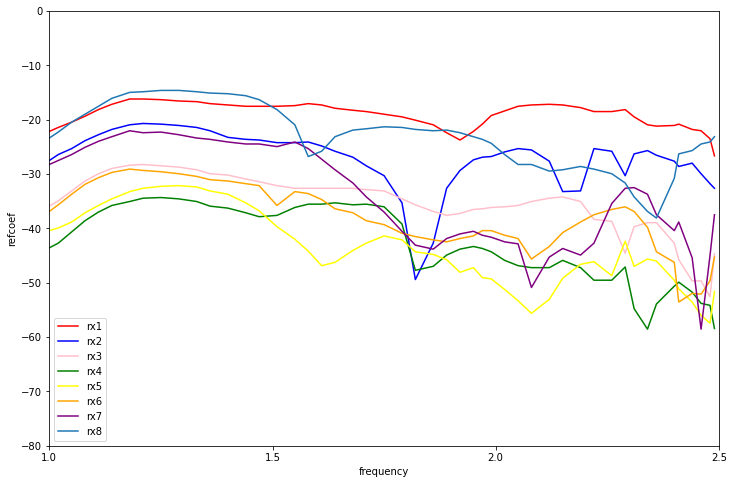

In [19]:
plt.figure(figsize=(12,8))
plt.plot(rx1_data['frequency'],rx1_data['refcoef'],color = 'red')
plt.plot(rx1_data['frequency'],rx2_data['refcoef'],color = 'blue')
plt.plot(rx1_data['frequency'],rx3_data['refcoef'],color = 'pink')
plt.plot(rx1_data['frequency'],rx4_data['refcoef'],color = 'green')
plt.plot(rx1_data['frequency'],rx5_data['refcoef'],color = 'yellow')
plt.plot(rx1_data['frequency'],rx6_data['refcoef'],color = 'orange')
plt.plot(rx1_data['frequency'],rx7_data['refcoef'],color = 'purple')
plt.plot(rx1_data['frequency'],rx8_data['refcoef'])
plt.xlabel('frequency')
plt.xticks(np.arange(1,3,0.5))
plt.xlim([1,2.5])
plt.yticks(np.arange(-80,10,10))
plt.ylabel('refcoef')
plt.ylim([-80,0])
plt.legend(['rx1','rx2','rx3','rx4','rx5','rx6','rx7','rx8'])
plt.savefig('self-generate.png')

## Inverse fourier transform

C:\Users\admin\AppData\Local\Temp/ipykernel_24276/1331711812.py:2: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  k1 = ifft(rx1_data.refcoef.values)
C:\Users\admin\AppData\Local\Temp/ipykernel_24276/1331711812.py:3: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  k2 = ifft(rx2_data.refcoef.values)
C:\Users\admin\AppData\Local\Temp/ipykernel_24276/1331711812.py:4: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  k3 = ifft(rx3_data.refcoef.values)
C:\Users\admin\AppData\Local\Temp/ipykernel_24276/1331711812.py:5: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  k4 = ifft(rx4_data.refcoef.values)
C:\Users\admin\AppData\Local\Temp/ipykernel_24276/1331711812.py:6: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use 

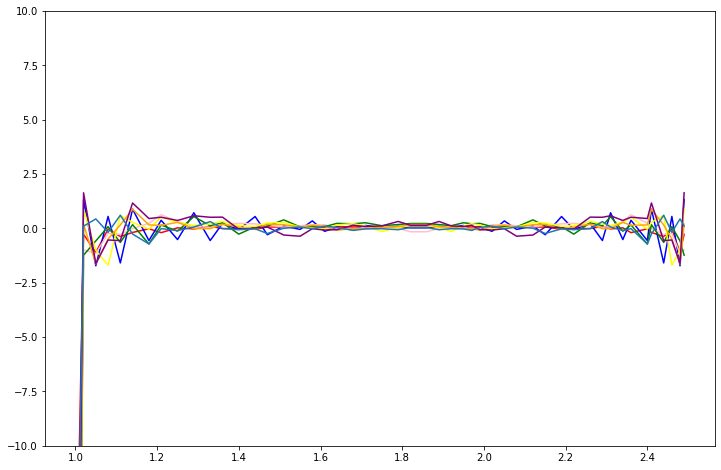

In [22]:
from scipy import ifft
k1 = ifft(rx1_data.refcoef.values)
k2 = ifft(rx2_data.refcoef.values)
k3 = ifft(rx3_data.refcoef.values)
k4 = ifft(rx4_data.refcoef.values)
k5 = ifft(rx5_data.refcoef.values)
k6 = ifft(rx6_data.refcoef.values)
k7 = ifft(rx7_data.refcoef.values)
k8 = ifft(rx8_data.refcoef.values)
plt.figure(figsize=(12,8))
plt.ylim([-10,10])
plt.plot(rx1_data['frequency'],k1,color = 'red')
plt.plot(rx1_data['frequency'],k2,color = 'blue')
plt.plot(rx1_data['frequency'],k3,color = 'pink')
plt.plot(rx1_data['frequency'],k4,color = 'green')
plt.plot(rx1_data['frequency'],k5,color = 'yellow')
plt.plot(rx1_data['frequency'],k6,color = 'orange')
plt.plot(rx1_data['frequency'],k7,color = 'purple')
plt.plot(rx1_data['frequency'],k8)


C:\Users\admin\AppData\Local\Temp/ipykernel_24276/527946061.py:1: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  k1 = ifft(rx1_data.refcoef.values)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


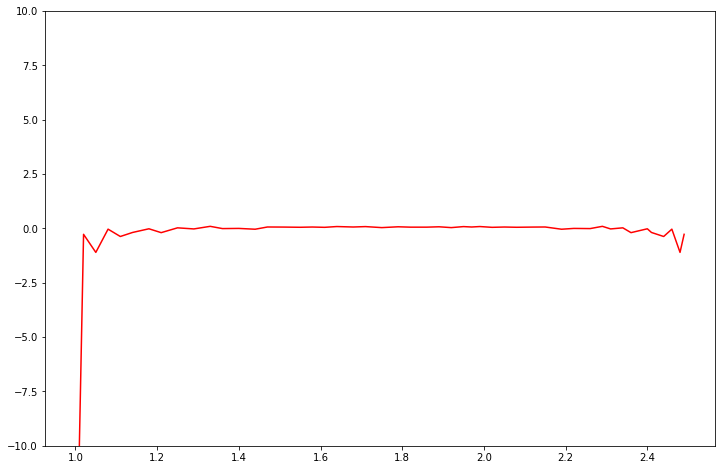

In [23]:
k1 = ifft(rx1_data.refcoef.values)
plt.figure(figsize=(12,8))
plt.ylim([-10,10])
plt.plot(rx1_data['frequency'],k1,color = 'red')

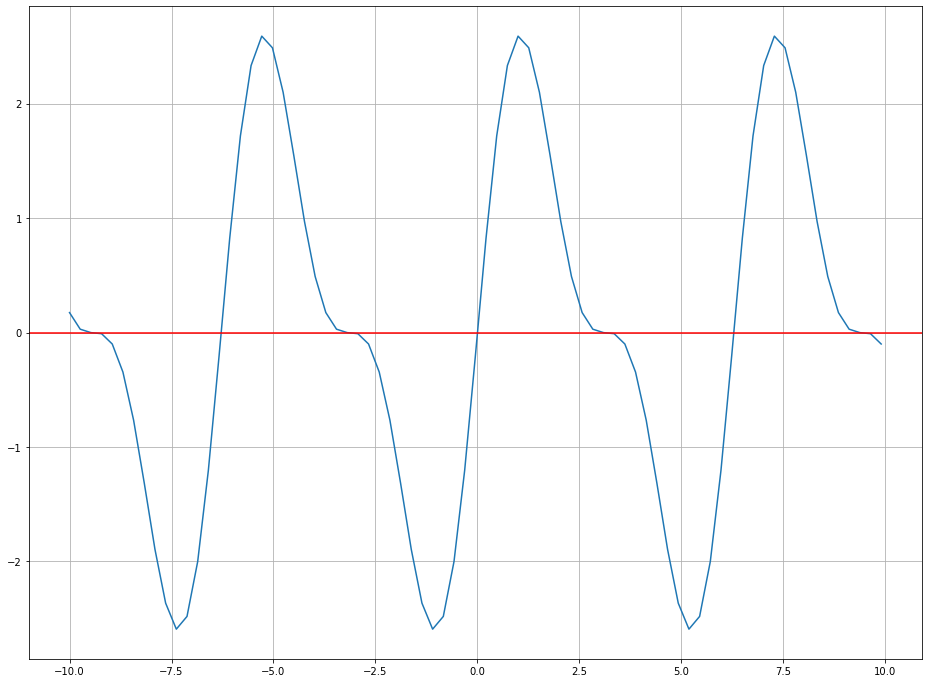

In [50]:
time  = np.arange(-10,10,np.pi/12)
signal1 = 2*np.sin(time)
signal2 = np.sin(2*time)
sum_signal =signal1+signal2
plt.figure(figsize=(16,12))
plt.plot(time,sum_signal)
plt.grid(True,which='both')
plt.axhline(0,color='red')


In [62]:
data_lst = []
data_lst.append(rx1_data)
data_lst.append(rx2_data)
data_lst.append(rx3_data)
data_lst.append(rx4_data)
data_lst.append(rx5_data)
data_lst.append(rx6_data)
data_lst.append(rx7_data)
data_lst.append(rx8_data)

In [63]:
color_lst = ['red','blue','pink','green','yellow','orange','purple','brown']


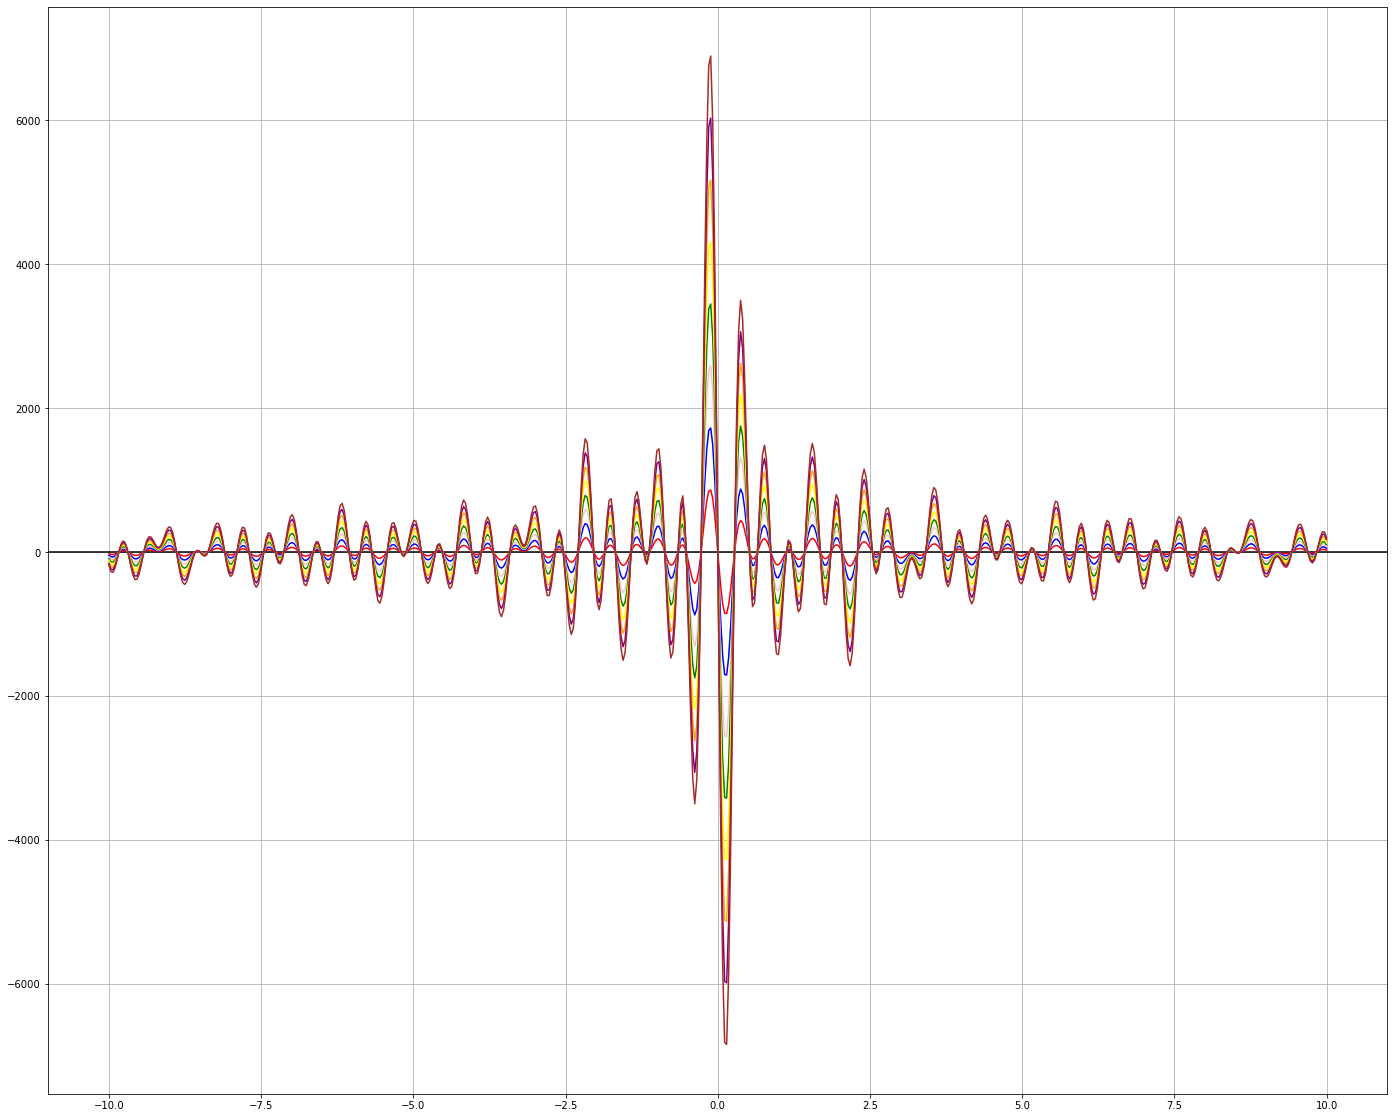

In [77]:
rx1_data.frequency.values
time  = np.arange(-10,10,np.pi/96)
signal_lst=[]
signal = 0
plt.figure(figsize=(24,20))
plt.grid(True,which='both')
plt.axhline(0,color='black')
for data,color in zip(data_lst,color_lst):
    for frequency,amplitude in zip(data.frequency.values,rx1_data.refcoef.values):
        signal += amplitude*np.sin(2*np.pi*frequency*time)
    plt.plot(time,signal,color=color)


## Delay and sum

In [85]:
per = 5.68E+1
k1

array([-1.91911222e+01+0.j        , -2.74414155e-01+0.63469041j,
       -1.10494346e+00+0.34526378j, -3.63087748e-02+0.59370306j,
       -3.73952524e-01-0.21549881j, -1.88462597e-01+0.16924674j,
       -1.95802521e-02-0.07116331j, -1.97067222e-01+0.14918638j,
        2.41678487e-02+0.08985585j, -2.63375222e-02+0.17739011j,
        9.31527863e-02+0.10450292j, -1.03685116e-02+0.02032394j,
       -2.63068988e-03+0.08746698j, -3.96326664e-02+0.06159464j,
        6.26960951e-02+0.11973224j,  5.89246014e-02+0.0532631j ,
        5.00468196e-02+0.06156315j,  6.12803282e-02+0.04606888j,
        4.74264467e-02+0.07261948j,  8.34873524e-02+0.03099854j,
        6.23881397e-02+0.02757515j,  8.09922492e-02+0.00288428j,
        3.43973823e-02-0.01038176j,  7.21457109e-02+0.00563055j,
        5.54287350e-02-0.02218855j,  5.54287350e-02+0.02218855j,
        7.21457109e-02-0.00563055j,  3.43973823e-02+0.01038176j,
        8.09922492e-02-0.00288428j,  6.23881397e-02-0.02757515j,
        8.34873524e-02-0.

<AxesSubplot:>

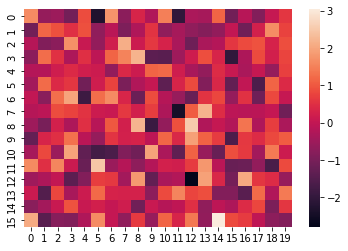

In [98]:
np.random.seed(1)
x= np.random.randn(16,20)
sb.heatmap(x)


In [100]:
delay_mat = np.zeros((16,20))
delay_mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [105]:
rx1_x,rx1_y=6,15
rx2_x,rx2_y=3,11
rx3_x,rx3_y=3,6
rx4_x,rx4_y=5,2
rx5_x,rx5_y=15,2
rx6_x,rx6_y=17,6
rx7_x,rx7_y=17,11
rx8_x,rx8_y=14,15

In [ ]:
for col in range(delay_mat.shape[0]):
    

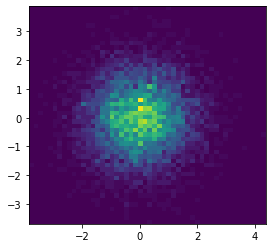

In [91]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# Generate some test data
x = np.random.randn(8873)
y = np.random.randn(8873)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

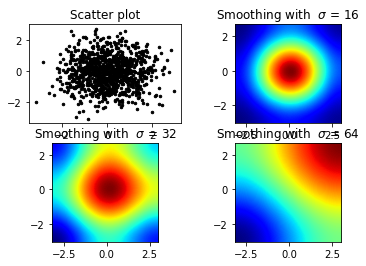

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=100):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2)

# Generate some test data
x = np.random.randn(1000)
y = np.random.randn(1000)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()


In [96]:
print(x1.shape,y1.shape)


(1000,) (1000,)


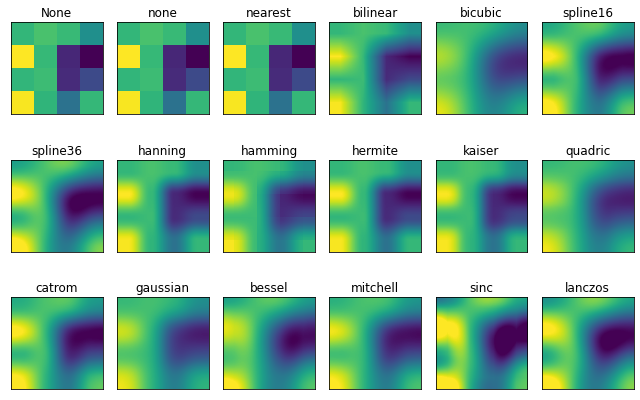

In [81]:
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()


In [82]:
grid

array([[0.7003673 , 0.74275081, 0.70928001, 0.56674552],
       [0.97778533, 0.70633485, 0.24791576, 0.15788335],
       [0.69769852, 0.71995667, 0.25774443, 0.34154678],
       [0.96876117, 0.6945071 , 0.46638326, 0.7028127 ]])